# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2
import plotly.express as px
import plotly.io as pio

# Load Data

In [3]:
data = pd.read_csv('data/owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [47]:
drop_columns = ['total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million',
                'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million' , 'hosp_patients_per_million' ,
                'weekly_icu_admissions_per_million' ,'weekly_hosp_admissions_per_million' ,'new_vaccinations_smoothed_per_million' ,
                'excess_mortality_cumulative_per_million' ]
data = data.drop(columns =drop_columns )
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN


In [48]:
data_Confirmed_cases_cols = ['location','date','new_cases','new_cases_smoothed','total_cases']

data_Confirmed_deaths_cols = ['location','date','new_deaths','new_deaths_smoothed','total_deaths']

data_Excess_mortality_cols = ['location','date','excess_mortality','excess_mortality_cumulative','excess_mortality_cumulative_absolute']

data_Hospital_ICU_cols = ['location','date','icu_patients','weekly_icu_admissions' ,'hosp_patients', 'weekly_hosp_admissions']

data_Policy_responses_cols = ['location','date','stringency_index']

data_Reproduction_rate_cols = ['location','date','reproduction_rate']

data_Tests_positivity_cols = ['location','date','total_tests','total_tests_per_thousand','new_tests' , 'new_tests_per_thousand',
                              'new_tests_smoothed','new_tests_smoothed_per_thousand','positive_rate','tests_per_case' , 'tests_units']

data_Vaccinations_cols = ['location','date','total_vaccinations','people_vaccinated' ,'people_fully_vaccinated', 'total_boosters','new_vaccinations',
                          'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                          'total_boosters_per_hundred','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred']


data_Others_cols = ['location','date','iso_code','continent' ,'population', 'population_density','median_age','aged_65_older',
                    'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers',
                    'male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index']


In [49]:
data_Confirmed_cases = data[data_Confirmed_cases_cols]
data_Confirmed_deaths = data[data_Confirmed_deaths_cols]
data_Excess_mortality = data[data_Excess_mortality_cols]
data_Hospital_ICU = data[data_Hospital_ICU_cols]
data_Policy_responses = data[data_Policy_responses_cols]
data_Reproduction_rate = data[data_Reproduction_rate_cols]
data_Tests_positivity = data[data_Tests_positivity_cols]
data_Vaccinations = data[data_Vaccinations_cols]
data_Others = data[data_Others_cols]

# Part1 : Design Database

## Connect to DB

In [50]:
def connect():
    return psycopg2.connect(database = 'covid_db' , 
                        user = 'postgres' ,
                        password = '1234' , 
                        host = 'localhost')

## Create Table

In [51]:
def create_table():
    
    commands = (
        """
        CREATE TABLE IF NOT EXISTS Others(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             iso_code VARCHAR(40),
             continent VARCHAR(40),
             population REAL,
             population_density FLOAT,
             median_age FLOAT,
             aged_65_older FLOAT,
             aged_70_older FLOAT,
             gdp_per_capita FLOAT,
             extreme_poverty FLOAT,
             cardiovasc_death_rate FLOAT,
             diabetes_prevalence FLOAT,
             female_smokers FLOAT,
             male_smokers FLOAT,
             handwashing_facilities FLOAT,
             hospital_beds_per_thousand FLOAT,
             life_expectancy FLOAT,
             human_development_index FLOAT,
             PRIMARY KEY(location,date)

        )
        """,

        """
        CREATE TABLE IF NOT EXISTS Confirmed_cases(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             new_cases REAL,
             new_cases_smoothed FLOAT,
             total_cases REAL,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)

        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Confirmed_deaths(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             new_deaths REAL,
             new_deaths_smoothed FLOAT,
             total_deaths REAL,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)
        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Excess_mortality(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             excess_mortality REAL,
             excess_mortality_cumulative REAL,
             excess_mortality_cumulative_absolute FLOAT,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)
        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Hospital_ICU(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             icu_patients REAL,
             weekly_icu_admissions REAL,
             hosp_patients REAL,
             weekly_hosp_admissions REAL,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)
        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Policy_responses(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             stringency_index FLOAT,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)
        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Reproduction_rate(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             reproduction_rate FLOAT,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)
        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Tests_positivity(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             total_tests REAL,
             total_tests_per_thousand FLOAT,
             new_tests REAL,
             new_tests_per_thousand FLOAT,
             new_tests_smoothed FLOAT, 
             new_tests_smoothed_per_thousand FLOAT,
             positive_rate FLOAT,
             tests_per_case FLOAT,
             tests_units VARCHAR(40),
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)

        )
        """ , 
        """
        CREATE TABLE IF NOT EXISTS Vaccinations(
             location VARCHAR(40) NOT NULL,
             date DATE NOT NULL,
             total_vaccinations REAL,
             people_vaccinated REAL,
             people_fully_vaccinated REAL,
             total_boosters REAL,
             new_vaccinations REAL,
             new_vaccinations_smoothed FLOAT,
             total_vaccinations_per_hundred FLOAT,
             people_vaccinated_per_hundred FLOAT,
             people_fully_vaccinated_per_hundred FLOAT,
             total_boosters_per_hundred FLOAT,
             new_people_vaccinated_smoothed FLOAT,
             new_people_vaccinated_smoothed_per_hundred FLOAT,
             PRIMARY KEY(location,date),
             CONSTRAINT fk_user
                  FOREIGN KEY(location,date)
                  REFERENCES Others(location,date)
        )
        """ 
        )

    conn = None
    try:
        conn = connect()
        curser = conn.cursor()
        
        for command in commands:
            curser.execute(command)
        curser.close()
        conn.commit()
        
    except (Exception, psycopg2.DatabaseError) as error:
         print(error)
    finally:
        if conn is not None:
            conn.close()
                
create_table()    

## Define 9 Tables

### Table1: Others

In [52]:
class Others:
    def __init__(self,location,iso_code,continent,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index) -> None:
        self.location = location
        self.date = date
        self.iso_code = iso_code
        self.continent = continent
        self.population = population
        self.population_density = population_density
        self.median_age = median_age
        self.aged_65_older = aged_65_older
        self.aged_70_older = aged_70_older
        self.gdp_per_capita = gdp_per_capita
        self.extreme_poverty = extreme_poverty
        self.cardiovasc_death_rate = cardiovasc_death_rate
        self.diabetes_prevalence = diabetes_prevalence
        self.female_smokers = female_smokers
        self.male_smokers = male_smokers
        self.handwashing_facilities = handwashing_facilities
        self.hospital_beds_per_thousand = hospital_beds_per_thousand
        self.life_expectancy = life_expectancy
        self.human_development_index = human_development_index


    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Others(location,iso_code,continent,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)' , (self.location,self.date,self.iso_code,self.continent,self.population,self.population_density,self.median_age,self.aged_65_older,self.aged_70_older,self.gdp_per_capita,self.extreme_poverty,self.cardiovasc_death_rate,self.diabetes_prevalence,self.female_smokers,self.male_smokers,self.handwashing_facilities,self.hospital_beds_per_thousand,self.life_expectancy,self.human_development_index))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Others(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s)" % ( cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)
                

### Table2: Confirmed cases

In [53]:
class Confirmed_cases:
    def __init__(self,location,date,new_cases,new_cases_smoothed,total_cases) -> None:
        self.location = location
        self.date = date
        self.new_cases = new_cases
        self.new_cases_smoothed = new_cases_smoothed
        self.total_cases = total_cases

    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Confirmed_cases(location,date,new_cases,new_cases_smoothed,total_cases) VALUES(%s,%s,%s,%s,%s)' , (self.location,self.date,self.new_cases,self.new_cases_smoothed,self.total_cases))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Confirmed_cases(%s) VALUES(%%s,%%s,%%s,%%s,%%s)" % ( cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)            

### Table3: Confirmed_deaths

In [54]:
class Confirmed_deaths:
    def __init__(self,location,date,new_deaths,new_deaths_smoothed,total_deaths) -> None:
        self.location = location
        self.date = date
        self.new_deaths = new_deaths
        self.new_deaths_smoothed = new_deaths_smoothed
        self.total_deaths = total_deaths

    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Confirmed_deaths(location,date,new_deaths,new_deaths_smoothed,total_deaths) VALUES(%s,%s,%s,%s,%s)' , (self.location,self.date,self.new_deaths,self.new_deaths_smoothed,self.total_deaths))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = "INSERT INTO Confirmed_deaths(%s) VALUES(%%s,%%s,%%s,%%s,%%s)" % (cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)

### Table4: Excess_mortality

In [55]:
class Excess_mortality:
    def __init__(self,location,date,excess_mortality,excess_mortality_cumulative,excess_mortality_cumulative_absolute) -> None:
        self.location = location
        self.date = date
        self.excess_mortality = excess_mortality
        self.excess_mortality_cumulative = excess_mortality_cumulative
        self.excess_mortality_cumulative_absolute = excess_mortality_cumulative_absolute

    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Confirmed_deaths(location,date,excess_mortality,excess_mortality_cumulative,excess_mortality_cumulative_absolute) VALUES(%s,%s,%s,%s,%s)' , (self.location,self.date,self.excess_mortality,self.excess_mortality_cumulative,self.excess_mortality_cumulative_absolute))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Excess_mortality(%s) VALUES(%%s,%%s,%%s,%%s,%%s)" % (cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)               

### Table5: Hospital_ICU

In [56]:
class Hospital_ICU:
    def __init__(self,location,date,icu_patients,weekly_icu_admissions,hosp_patients,weekly_hosp_admissions) -> None:
        self.location = location
        self.date = date
        self.icu_patients = icu_patients
        self.weekly_icu_admissions = weekly_icu_admissions
        self.hosp_patients = hosp_patients
        self.weekly_hosp_admissions = weekly_hosp_admissions

    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Hospital_ICU(location,date,icu_patients,weekly_icu_admissions,hosp_patients,weekly_hosp_admissions) VALUES(%s,%s,%s,%s,%s,%s)' , (self.location,self.date,self.icu_patients,self.weekly_icu_admissions,self.hosp_patients,self.weekly_hosp_admissions))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Hospital_ICU(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s)" % (cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)              

### Table6: Policy_responses

In [57]:
class Policy_responses:
    def __init__(self,location,date,stringency_index) -> None:
        self.location = location
        self.date = date
        self.stringency_index = stringency_index


    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Policy_responses(location,date,stringency_index) VALUES(%s,%s,%s)' , (self.location,self.date,self.stringency_index))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Policy_responses(%s) VALUES(%%s,%%s,%%s)" % ( cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)

### Table7: Reproduction_rate

In [58]:
class Reproduction_rate:
    def __init__(self,location,date,reproduction_rate) -> None:
        self.location = location
        self.date = date
        self.reproduction_rate = reproduction_rate


    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Reproduction_rate(location,date,reproduction_rate) VALUES(%s,%s,%s)' , (self.location,self.date,self.reproduction_rate))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Reproduction_rate(%s) VALUES(%%s,%%s,%%s)" % ( cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)

### Table8: Tests_positivity

In [59]:
class Tests_positivity:
    def __init__(self,location,date,total_tests,total_tests_per_thousand,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units) -> None:
        self.location = location
        self.date = date
        self.total_tests = total_tests
        self.total_tests_per_thousand = total_tests_per_thousand
        self.new_tests = new_tests
        self.new_tests_per_thousand = new_tests_per_thousand
        self.new_tests_smoothed = new_tests_smoothed
        self.new_tests_smoothed_per_thousand = new_tests_smoothed_per_thousand
        self.positive_rate = positive_rate
        self.tests_per_case = tests_per_case
        self.tests_units = tests_units

    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Tests_positivity(location,date,total_tests,total_tests_per_thousand,new_tests,new_tests_per_thousand,new_tests_smoothed , new_tests_smoothed_per_thousand ,positive_rate ,tests_per_case,tests_units) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)' , (self.location,self.date,self.total_tests,self.total_tests_per_thousand,self.new_tests,self.new_tests_per_thousand,self.new_tests_smoothed,self.new_tests_smoothed_per_thousand,self.positive_rate,self.tests_per_case,self.tests_units))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Tests_positivity(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s)" % ( cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)

### Table9: Vaccinations

In [60]:
class Vaccinations:
    def __init__(self,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,
                 total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred ,new_people_vaccinated_smoothed,
                 new_people_vaccinated_smoothed_per_hundred) -> None:
        self.location = location
        self.date = date
        self.total_vaccinations = total_vaccinations
        self.people_vaccinated = people_vaccinated
        self.people_fully_vaccinated = people_fully_vaccinated
        self.total_boosters = total_boosters
        self.new_vaccinations = new_vaccinations
        self.new_vaccinations_smoothed = new_vaccinations_smoothed
        self.total_vaccinations_per_hundred = total_vaccinations_per_hundred
        self.people_vaccinated_per_hundred = people_vaccinated_per_hundred
        self.people_fully_vaccinated_per_hundred = people_fully_vaccinated_per_hundred
        self.total_boosters_per_hundred = total_boosters_per_hundred
        self.new_people_vaccinated_smoothed = new_people_vaccinated_smoothed
        self.new_people_vaccinated_smoothed_per_hundred = new_people_vaccinated_smoothed_per_hundred

    def save_to_db(self):
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.execute('INSERT INTO Vaccinations(location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred , people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)' , (self.location,self.date,self.total_vaccinations,self.people_vaccinated,self.people_fully_vaccinated , self.total_boosters,self.new_vaccinations,self.new_vaccinations_smoothed,self.total_vaccinations_per_hundred,self.people_vaccinated_per_hundred,self.people_fully_vaccinated_per_hundred,self.total_boosters_per_hundred,self.new_people_vaccinated_smoothed,self.new_people_vaccinated_smoothed_per_hundred))
    # Define function using cursor.executemany() to insert the dataframe
    @staticmethod
    def save_many(df):
        tpls = [tuple(x) for x in df.to_numpy()]
        cols = ','.join(list(df.columns))
        sqll = sql = "INSERT INTO Vaccinations(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s)" % ( cols)
        with connect() as connection:
            with connection.cursor() as cursor:
                cursor.executemany(sqll, tpls)

### ONLY RUN ONCE!

In [61]:
# Others.save_many(data_Others)
# Confirmed_cases.save_many(data_Confirmed_cases)
# Confirmed_deaths.save_many(data_Confirmed_deaths)            
# Excess_mortality.save_many(data_Excess_mortality)  
# Hospital_ICU.save_many(data_Hospital_ICU)            
# Policy_responses.save_many(data_Policy_responses)
# Reproduction_rate.save_many(data_Reproduction_rate)
# Tests_positivity.save_many(data_Tests_positivity)
# Vaccinations.save_many(data_Vaccinations)

<br/><br/><br/>
 <hr/> 
<br/>


# Part2: Data Analysis


## Subject1: Number of patients,deaths and vaccinated people in Iran over time(weekly)

In [62]:
IR = """
SELECT A.date,A.new_cases_smoothed,B.new_deaths_smoothed,C.new_vaccinations_smoothed
FROM Confirmed_cases AS A
INNER JOIN Confirmed_deaths AS B USING (location,date)
INNER JOIN Vaccinations AS C USING (location,date)
WHERE A.location = 'Iran'
ORDER BY A.date
"""

In [63]:
def iran_data():
    with connect() as connection:
        with connection.cursor() as cursor:
            cursor.execute(IR)
            return cursor.fetchall()
ir_data = iran_data()
ir_data = pd.DataFrame(data=np.vstack(ir_data),columns=['date','new_cases','new_deaths','new_vaccinations'])

In [64]:
ir_data['date'] = pd.to_datetime(ir_data['date'], errors='coerce')
ir_data = ir_data.groupby(pd.Grouper(key='date', axis=0, freq='7D')).sum()
ir_data.reset_index(level=0, inplace=True)

In [65]:
from persiantools.jdatetime import JalaliDate
def func_to_jalali(date_string):
    date_string = str(date_string)
    year = int(date_string[:4])                           
    month = int(date_string[5:7])                      
    day   = int(date_string[8:10])
    return str(JalaliDate.to_jalali(year,month,day))

ir_data['date'] = ir_data['date'].apply(func_to_jalali)

In [66]:
import re
def remove_two_digit_of_year(x):
    x = re.findall(r'\d\d(\d\d-\d\d-\d\d)',x)
    return x[0]
    
ir_data['date'] = ir_data['date'].apply(remove_two_digit_of_year)

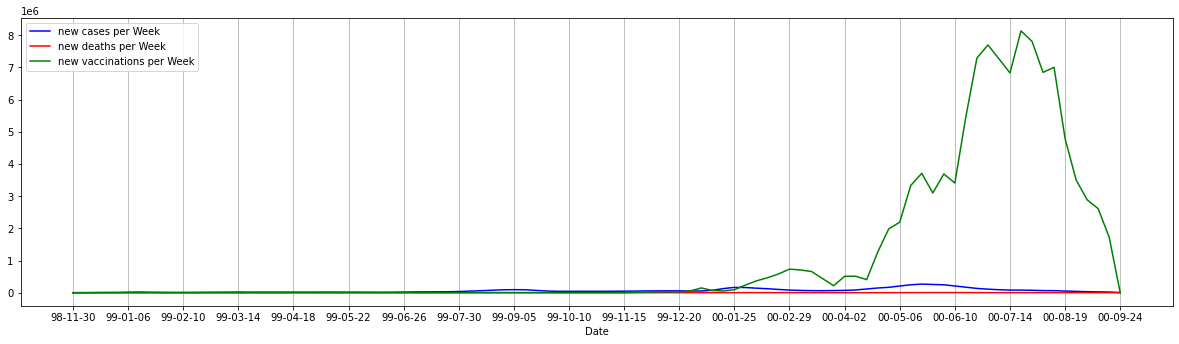

In [67]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_axes([0,0,1,1])

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(10)

ax.xaxis.set_major_locator(plt.MaxNLocator(ir_data.shape[0]/4))
#ax.set_xticklabels(only_year_month)
ax.grid(axis='x')

ax.plot(ir_data['date'] ,ir_data['new_cases'] ,color='b' , label ='new cases per Week')
ax.plot(ir_data['date'] ,ir_data['new_deaths'] ,color='r' , label ='new deaths per Week')
ax.plot(ir_data['date'] ,ir_data['new_vaccinations'] ,color='g' , label ='new vaccinations per Week')

ax.set_xlabel("Date")
ax.legend(loc=0)

#### می کشیمSubplotچون اسکیل سه نمودار با هم فرق دارید، برای مقایسه بهتر در یک جدول به صورت 
##### تفاوت اسکیل سه نمودار طبیعی است. چون برای مثال آمار افرادی که روزانه واکسن زده اند خیلی بیشتر از آمار افرادی است که روزانه مبتلا شده اند
##### و آمار افرادی که روزانه مبتلا شده اند خیلی بیشتر از افرادی است که روزانه فوت می کنند

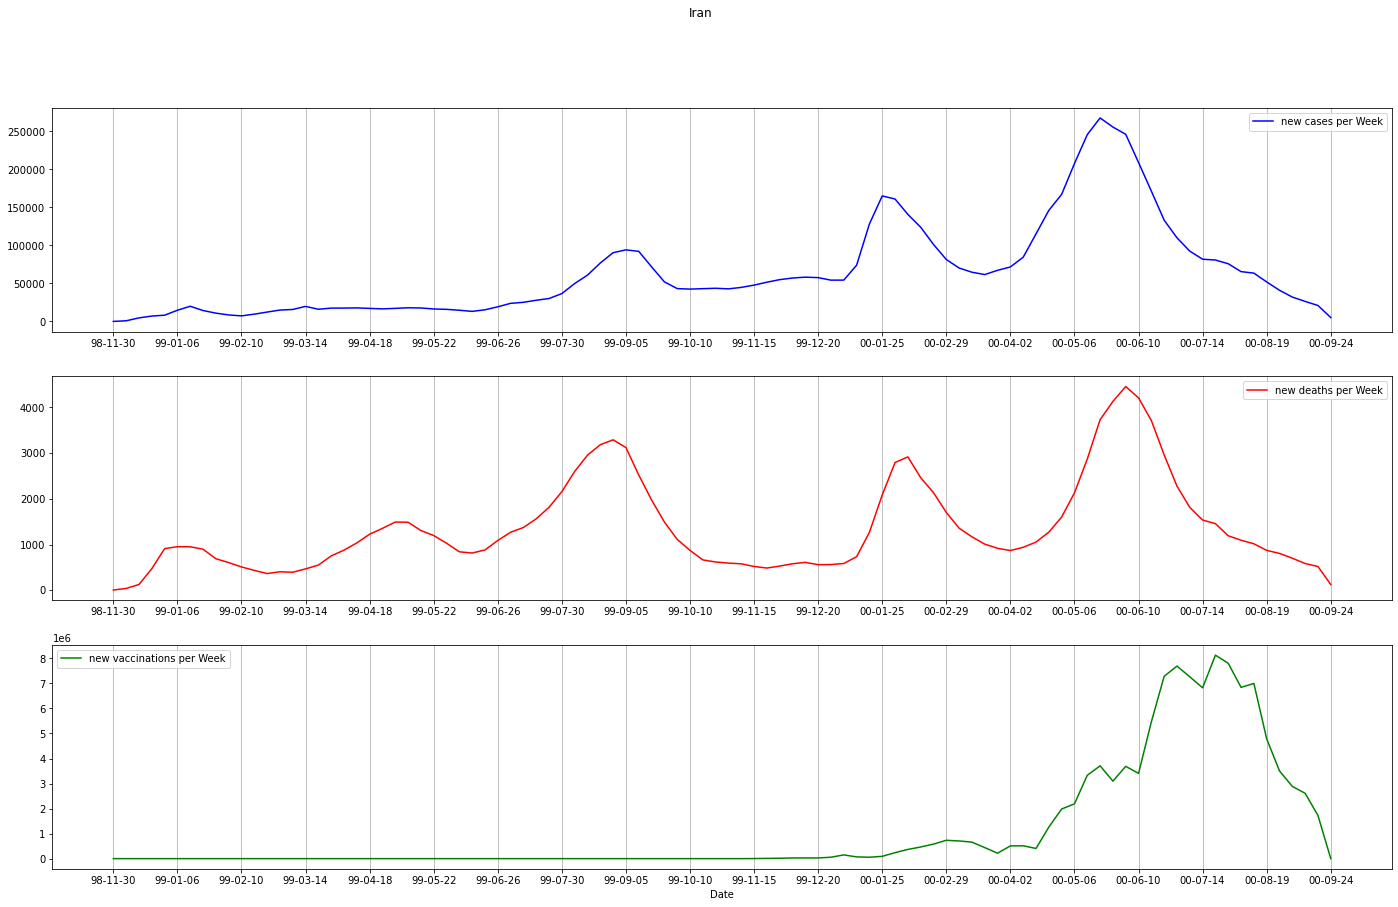

In [68]:
def remove_day(x):
    x1 = re.findall('(\d\d-\d\d)-\d\d' , x)
    return x1[0]

new_date = ir_data['date'].apply(remove_day)


fig, ax = plt.subplots(3 , figsize=(24,14))
fig.suptitle('Iran')


for i in range(3):
    for label in ax[i].xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(10)
        
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(ir_data['date'].shape[0]/4))
    ax[i].grid(axis='x')
       
ax[2].set_xlabel("Date")    

ax[0].plot(ir_data['date'] ,ir_data['new_cases'] ,color='b' , label ='new cases per Week')
ax[1].plot(ir_data['date'] ,ir_data['new_deaths'] ,color='r' , label ='new deaths per Week')
ax[2].plot(ir_data['date'] ,ir_data['new_vaccinations'] ,color='g' , label ='new vaccinations per Week')

for i in range(3):
    ax[i].legend(loc=0)

## تحلیل نمودار سوال 1
* همانطور که میدانیم ایران از لحاظ مرگ و میر ، 5 پیک را پشت سر گذاشته است(تا اواخر آذر) که نمودار مرگ و میر که شکل وسطی است، این موضوع را تایید میکند
* همانطور که انتظار داریم، پیک های مرگ و میر با پیک های ابتلا تقریبا منطبق اند
* در نمودار مربوط به واکسن، داده هایمان تا تاریخ خرداد 99 تقرببا همگی نال هستند. دلیل آن هم نبود واکسن بوده است. در خرداد 99 واکسیناسیون به صورت کم برای کادر درمان شروع شده و رفته رفته زیاد شده است
* سپس به تدریج بعد از سپری کردن پیک کاهش یافته(چون جمعیت واکسینه شده اند!)
* همانطور که در بالاتر گفته شد اسکیل این سه نمودار نیز متفاوت است. چون آمار افرادی که روزانه واکسن زده اند خیلی بیشتر از آمار افرادی است که روزانه مبتلا شده اند
* همچنین آمار افرادی که روزانه واکسن زده اند خیلی بیشتر از آمار افرادی است که روزانه مبتلا شده اند
<br/><br/><br/>
 <hr/> 
<br/>

### Subject2: Checking the difference between government rigor during the corona peak and under normal circumstances. Does low rigor create a new wave?

In [69]:
Government = """
SELECT A.date,A.new_cases,B.stringency_index
FROM Confirmed_cases AS A
INNER JOIN Policy_responses AS B USING (location,date)
WHERE A.location = 'Iran'
ORDER BY A.date
"""

In [70]:
def iran_gov():
    with connect() as connection:
        with connection.cursor() as cursor:
            cursor.execute(Government)
            return cursor.fetchall()
ir_Government= iran_gov()

In [71]:
ir_Government= iran_gov()
#ir_Government['date'] = ir_Government['date'].apply(func_to_jalali)
 
#ir_Government['date'] = ir_Government['date'].apply(remove_two_digit_of_year)
date = [remove_two_digit_of_year(func_to_jalali(str(item[0]))) for item in ir_Government]

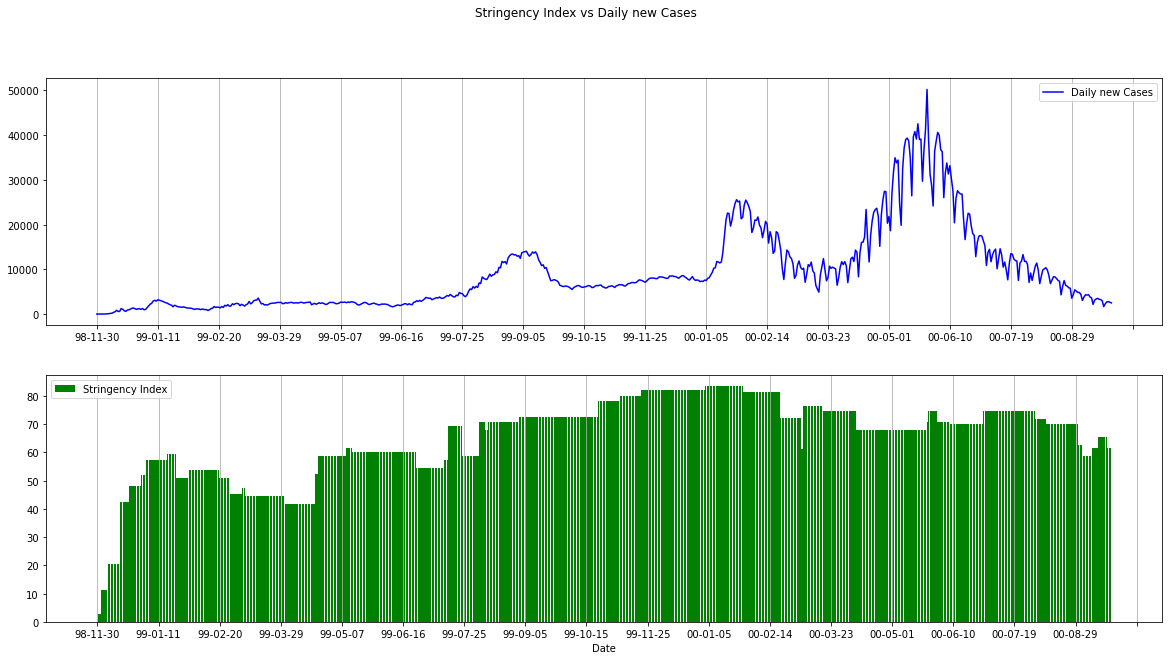

In [72]:
fig, ax = plt.subplots(2 , figsize=(20,10))
fig.suptitle('Stringency Index vs Daily new Cases')

for label in ax[0].xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(10)
    
ax[0].xaxis.set_major_locator(plt.MaxNLocator(ir_data['date'].shape[0]/4))
#ax[0].set_xticklabels(only_year_month)
ax[0].grid(axis='x')

for label in ax[1].xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(10)
    
ax[1].xaxis.set_major_locator(plt.MaxNLocator(ir_data['date'].shape[0]/4))
#ax[1].set_xticklabels(only_year_month)
ax[1].grid(axis='x')


ax[0].plot(date ,[item[1] for item in ir_Government] ,color='b' , label ='Daily new Cases')
ax[1].bar(date ,[item[2] for item in ir_Government] ,color='g' , label ='Stringency Index')
ax[0].legend(loc=0)
ax[1].set_xlabel("Date")
ax[1].legend(loc=0)

#### تحلیل نمودار سوال دوم
* در ابتدا، در واقع اوایل اسفند 98 رفته رفته سخت گیری ها افزایش می یابد. این سخت گیری ها تا اواسط عید سال 99 رفته رفته زیاد می شود
* بعد از عید سخت گیری ها کم می شود چون مسافرت ها تموم شده دیگه
* سپس در حوالی تیر ماه شاهد افزایش 10 درصدی سخت گیری ها هستیم. احتمالا برای کنترل سفرها در تابستان بوده
* در اواخر مهر 99 از آنجاییکه احتمالا دولت شروع یک پیک را تشخیص داده و البته واقعا پیک بوده، سخت گیری ها افزایش یافته
* در اوایل دی آمار مبتلایان به صورت خیلی ریز صعودی است و سخت گیری ها هم رفته رفته مجددا زیاد می شود. اوج سخت گیری در 1400 بوده که مصادف با پیک چهارم بوده است
* همانند اتفاقی که در عید 99 افتاد، در عید 400 نیز افتاد! بدین ورت که مجددا سخت گیری ها رفته رفته کاهش یافت
* ! احتمالا در پیک پنجم به کرونا اعتنای خاصی نشده . در واقع در پیک پنجم سحت گیری خاصی اعمال نشده. دلیل آن هم ممکن است این باشد که دولت پیش خودش گفته مردم واکسن زدن و می توان سخت گیری خاصی را اعمال نکرد
<br/><br/><br/>
 <hr/> 
<br/><br/><br/>


### Subject3: Effects of population density characteristics, age population, availability of health facilities, number of hospital beds and Human progress index on the number of deaths

In [73]:
Q_three = """
SELECT A.new_deaths,B.population_density,B.median_age,B.handwashing_facilities,B.hospital_beds_per_thousand,B.human_development_index
FROM Confirmed_deaths AS A
INNER JOIN Others AS B USING (location,date)
ORDER BY A.date
"""

In [74]:
def q3():
    with connect() as connection:
        with connection.cursor() as cursor:
            cursor.execute(Q_three)
            return cursor.fetchall()
q3_data = q3()

df = pd.DataFrame(data=np.vstack(q3_data),columns=['new_deaths','population_density','median_age',
                                                   'handwashing_facilities','hospital_beds_per_thousand','human_development_index'])
df = df.dropna()

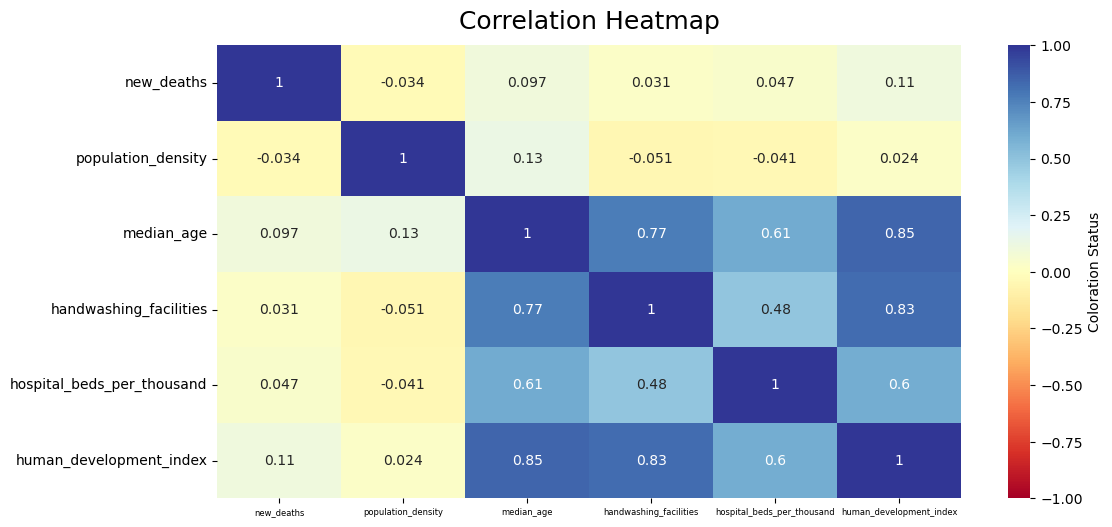

In [75]:
import seaborn as sns
plt.figure(figsize=(12, 6) , dpi=100)
#corr_data = df.corr().pivot_table(index='y', columns='x', values='z'),cbar_kws={'label': 'Color map'}
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlBu' , cbar_kws={'label': 'Coloration Status'})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 0, fontsize = 6);

#### تحلیل سوال سوم
##### طبق هیت مپ بالا داریم:
* پیشرفت شاحص انسانی در کشوری بالاست که اولا میانگین سنی شان بالاتر باشد. ثانیا از لحاظ بهداشتی نظیر تعداد تخت های بیمارستان نسبت به جمعیت و داشتن شیرهای آب برای شستن دست و ... وضعیت بهتری داشته باشند
* تعداد فوتی های روزانه کورولیشن مثبت ضعیفی با میانگین سنی دارد. در واقع هر چه میانگین سنی کشوری بیشتر باشد، تعداد فوتی ها بیشتر خواهد بود 
<br/><br/><br/>
 <hr/> 
<br/><br/><br/>

### Subject2: effect of vaccination on the number of deaths 


##### به نظر من نسبت مجموع واکسینه شده ها به جمعیت میتواند ملاک خوبی باشد. چون هر چه مجموع واکسینه شده ها بیشتر و جمعیت کمتر باشد، بهتر میتوان تاثیر واکسن را دید

In [76]:
Q_four = """
SELECT A.location,A.date,A.new_vaccinations,B.population , C.total_deaths , A.total_vaccinations ,C.new_deaths , B.hospital_beds_per_thousand, B.human_development_index , B.diabetes_prevalence 
FROM Vaccinations AS A
INNER JOIN Others AS B USING (location,date)
INNER JOIN Confirmed_deaths AS C USING (location,date)
"""

In [77]:
def q4():
    with connect() as connection:
        with connection.cursor() as cursor:
            cursor.execute(Q_four)
            return cursor.fetchall()
q4_data = q4()

In [78]:
df = pd.DataFrame(data=np.vstack(q4_data),columns=['Country','date','Daily_Vaccination' , 'Population','total_deaths' , 'total_vaccinations' , 'new_deaths' , 'hospital_beds_per_thousand' , 'human_development_index' , 'diabetes_prevalence' ])
df_without_null = df[(df.Daily_Vaccination != 'nan') & (df.Country != 'World') & (df.new_deaths >=0) ].dropna()

In [79]:
#df_without_null['Country'].unique()
#df_without_null[df_without_null.Country == 'South Korea']


##### من سعی کردم ملاک هایی رو در نظر بگیرم که خروجیش یه کشوری رو بده که پیشرفته هستش و برای مثال واکشن های بدرد بخوری زده باشن
###### مثلا شاخص پیشرفت انسانی
##### معیار دومی که در نظر گرفتم میزان دیابت بوده 
###### چون خواستم مرگ و میر هایی که انجام شده وابستگی خاصی به میزان دیابت نداشته باشند . دلیل منفی گذاشتن در کوئری پایین این است که ما دنبال کم بودن دیابت هستیم
#### جهت اینکه بتونم معیارهارو با هم ترکیب خطی کنم، آن ها را **نرمال** کردم

In [80]:
import pandasql as ps
q1 = """
        SELECT Country, (AVG(human_development_index) - 0.734)/0.091   - (AVG(diabetes_prevalence)-8.52)/8.78 + ((SUM(Daily_Vaccination) / AVG(Population))/2.24 ) + (AVG(hospital_beds_per_thousand)-0.2)/6.8 + (AVG(Population)-6.756425e+07)/(1.444216e+09 - 6.756425e+07)   AS metric , AVG(Population) AS average_population
        FROM df_without_null 
        GROUP BY Country
        ORDER BY (AVG(human_development_index) - 0.734)/0.091  - (AVG(diabetes_prevalence)-8.52)/8.78 + ((SUM(Daily_Vaccination) / AVG(Population))/2.24 ) + (AVG(hospital_beds_per_thousand)-0.2)/6.8 + (AVG(Population)-6.756425e+07)/(1.444216e+09 - 6.756425e+07)    DESC
"""
ten_country = ps.sqldf(q1, locals()).head(20)

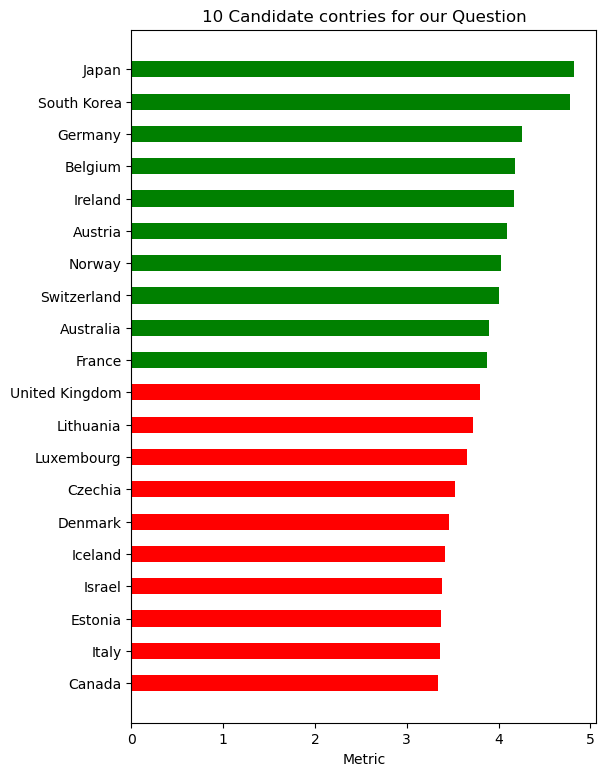

In [81]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(6,9))
# Example data
countries = ten_country['Country']
y_pos = np.arange(len(countries))
performance = ten_country['metric']

colors = []
for i in range(ten_country['Country'].shape[0]):
    if i<10:
        colors.append('green')
    else:
        colors.append('red')


ax.barh(y_pos, performance, align='center' , height =0.5 , color=colors)
ax.set_yticks(y_pos, labels=countries)
ax.invert_yaxis()
ax.set_xlabel('Metric')
ax.set_title('10 Candidate contries for our Question')
plt.show()

#### حال که 10 کشور نامزد را پیدا کردیم ، در یک نمودار تاثیر واکسن به فوتی ها را میتوانیم رسم کنیم

In [ ]:
final_df = df_without_null[['Country','total_vaccinations','new_deaths' , 'Population']]
a = ['total_vaccinations', 'new_deaths', 'Population']
for i in a:
    final_df[i] = final_df[i].astype(np.float64) 

final_df = pd.merge(final_df, ten_country , on = 'Country')
final_df['total_vaccinations_per_population'] = final_df['total_vaccinations'] / final_df['average_population']

final_df['daily_death_per_population'] = final_df['new_deaths']/final_df['average_population']

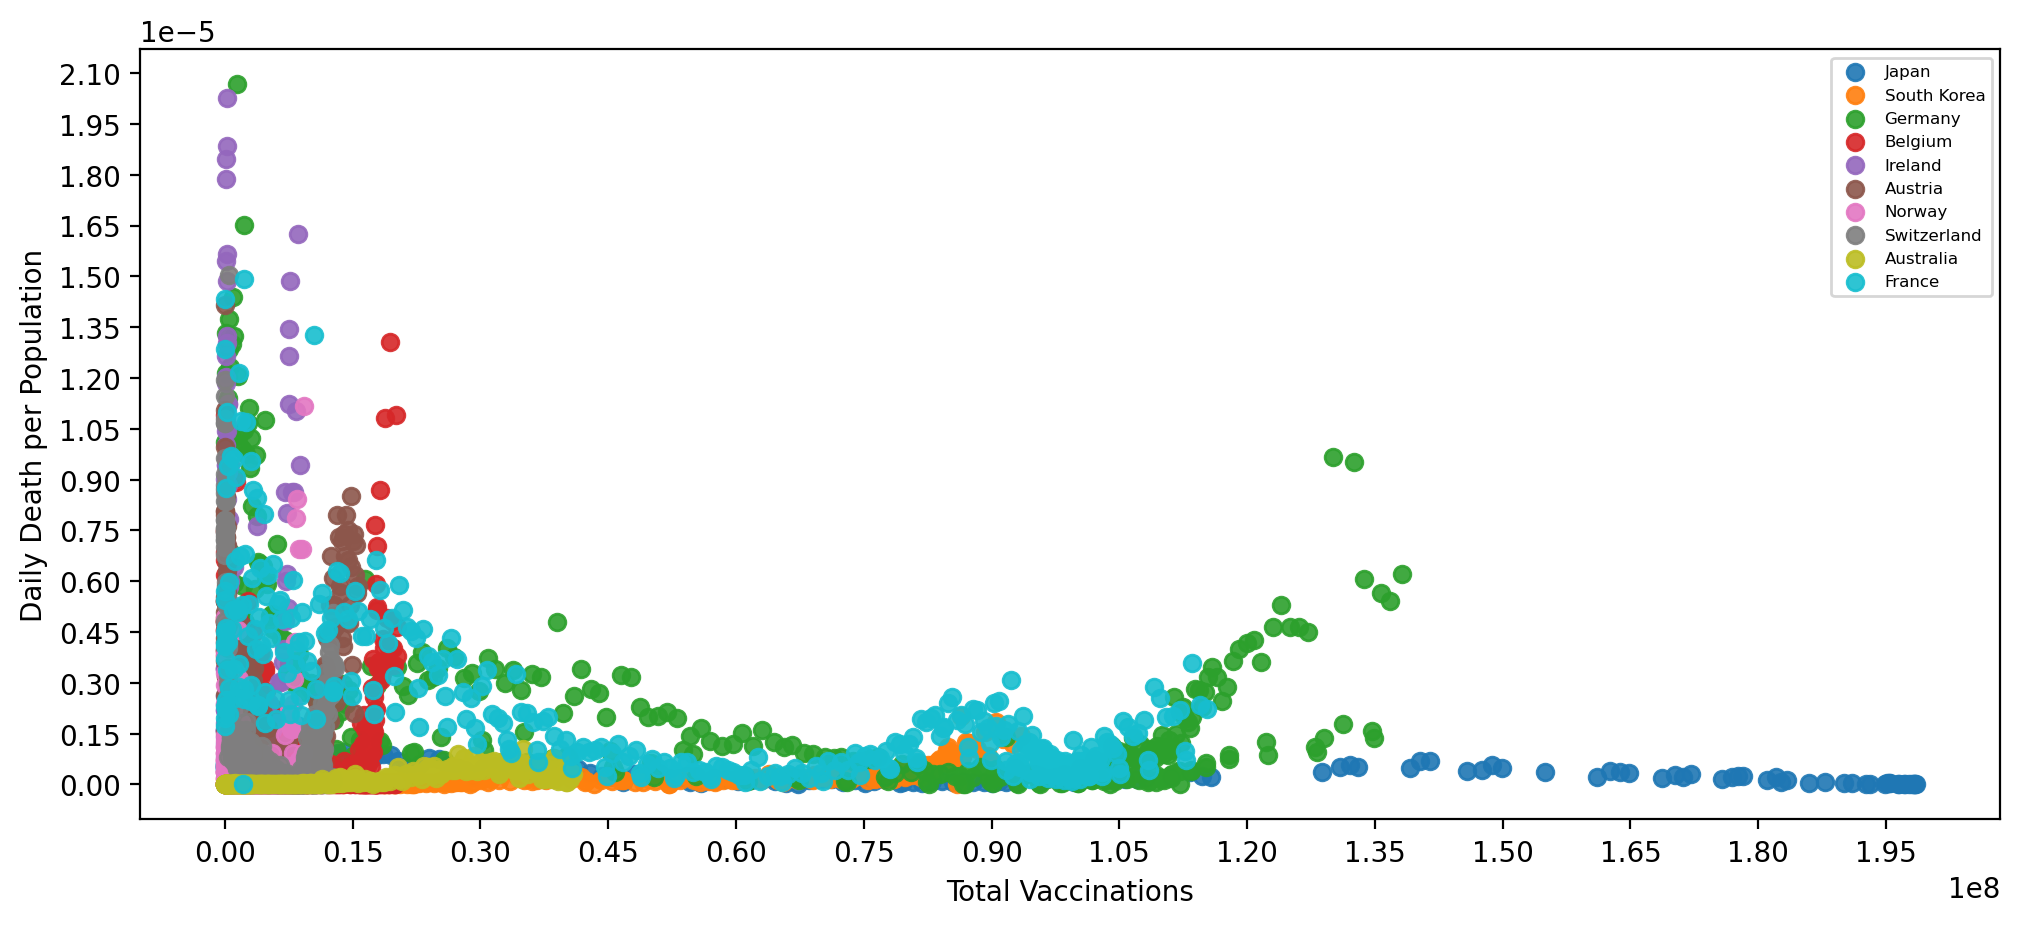

In [83]:
plt.figure(figsize=(12,5) , dpi =200)
for i in range(10):
        x = final_df[final_df.Country == ten_country.iloc[i,0]].total_vaccinations
        y = final_df[final_df.Country == ten_country.iloc[i,0]].daily_death_per_population

        plt.scatter( x, y ,label = ten_country.iloc[i,0] ,alpha = 0.9 )
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend(loc=0 , prop={'size': 6})
plt.xlabel('Total Vaccinations')
plt.ylabel('Daily Death per Population')
plt.plot()
plt.savefig('a.jpg')
#plt.axis(ymin=0, ymax=1.65*(10**-5));
 

<br/><br/><br/>
 <hr/> 
<br/>

###  برای مصور سازی بهتر داده ها ، هم مجموع واکسن های زده شده و هم فوتی های روزانه را بر جمعیت تقسیم کردم. چون برای مثال برای کشور های خیلی بزرگ آمار واکسن های زده شده و فوتی های روزانه انقدر بزرگه که داده های مربوط به کشور های کوچک خوب دیده نمیشود و به صورت فشرده نشان داده می شود 

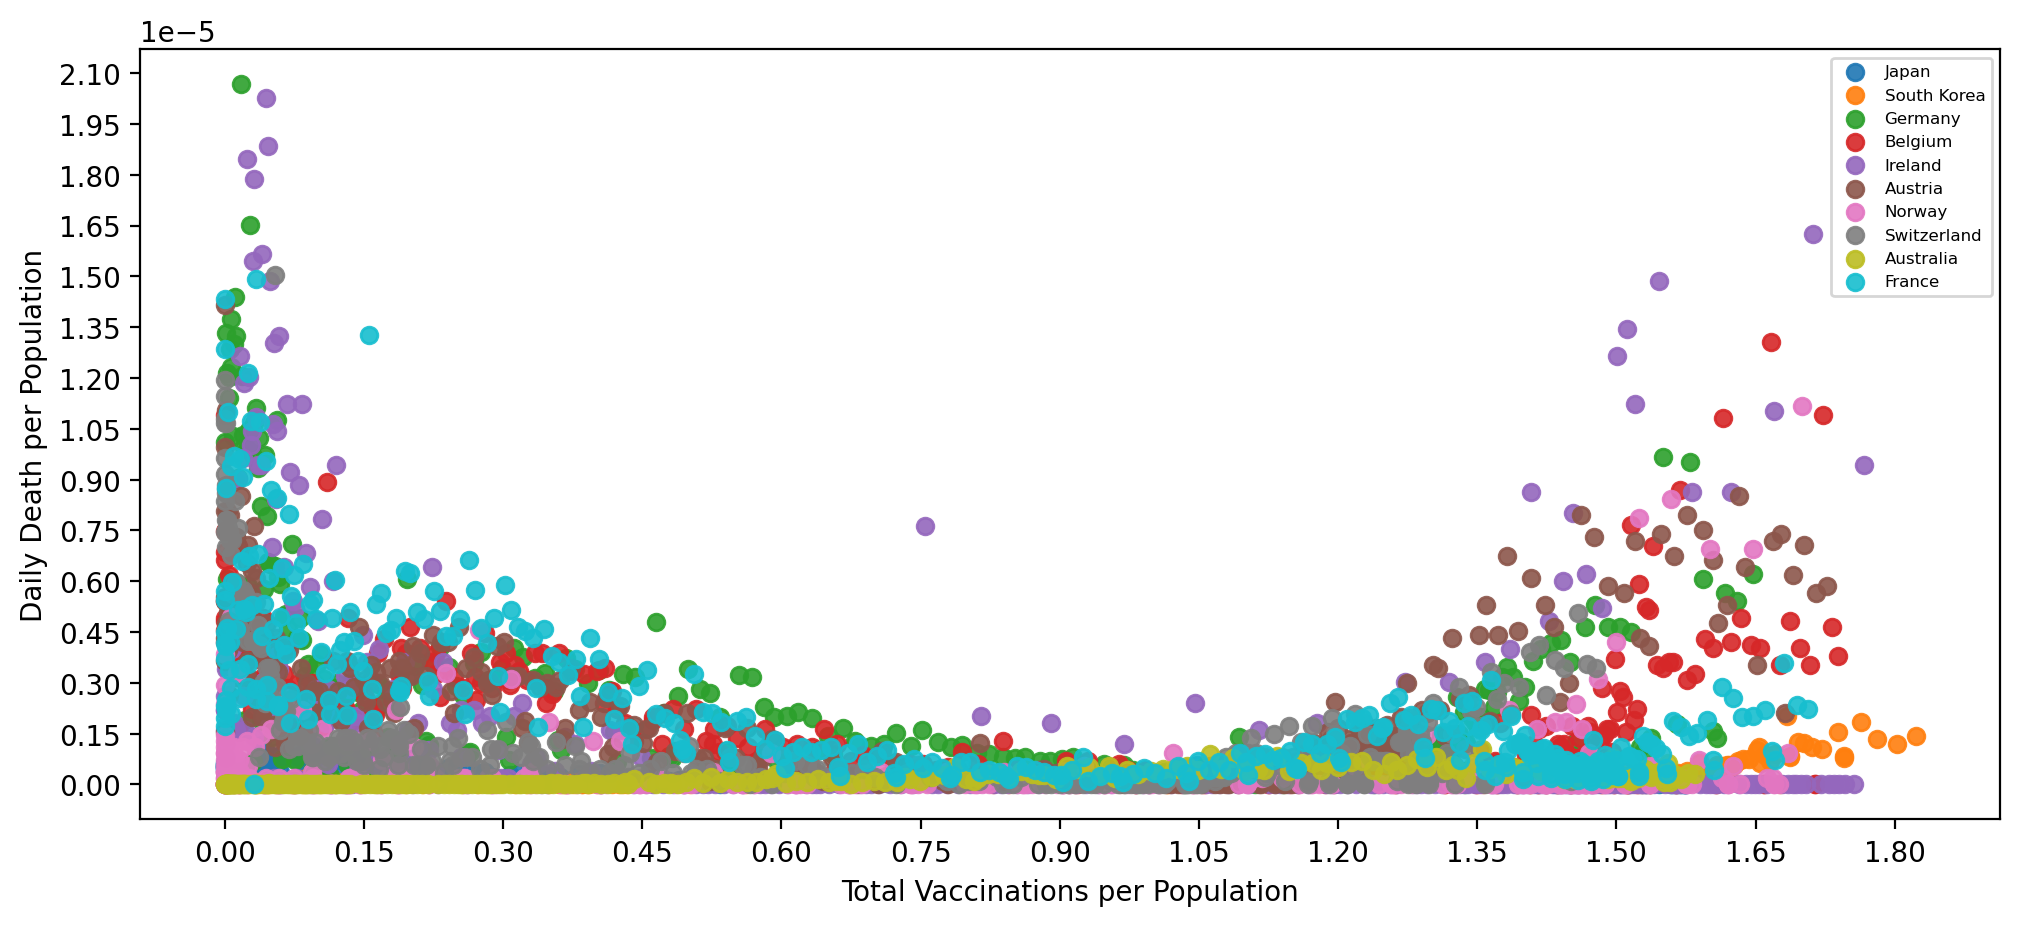

In [84]:
plt.figure(figsize=(12,5) , dpi =200)
for i in range(10):
        x = final_df[final_df.Country == ten_country.iloc[i,0]].total_vaccinations_per_population
        y = final_df[final_df.Country == ten_country.iloc[i,0]].daily_death_per_population

        plt.scatter( x, y ,label = ten_country.iloc[i,0] ,alpha = 0.9 )
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend(loc=0 , prop={'size': 6})
plt.xlabel('Total Vaccinations per Population')
plt.ylabel('Daily Death per Population')
plt.plot()
plt.savefig('a.jpg') 

#### تحلیل نمودار بالا
1. چون محور ایکس ها مربوط به مجموع واکسن می باشد ، لذا به نحوی محور ایکس را میتوان تاریخ تبیر کرد. چون با گذشت زمان مجموع واکسینه شده ها افزایش می یابد
###### : برای داده های هر کدام از کلاسها
*  آمار روزانه کرونا برای هر کدام از 10 کشور خیلی بالاست (x=0 در اوایل که واکسنی نبوده (نقطه 
* سپس با افزایش مجموع افرادی که واکسن زدند ، رفته رفته آمار روزانه کاهش می یابد تا جای که تقریبا ثابت می شود
* در اواخر نیز دوباره امار بالا رفته.احتمال میدهم که کرونای جهش یافته مثل دلتا ، برزیلی ، آفریقایی و ... که یه مدتیه اسمشو می شنویم شکل گرفته و به همین دلیل آمار بالا رفته
<br/><br/><br/>
 <hr/> 
<br/><br/><br/>

### Subject2: Showing the number of deaths of the last six months in different countries in relation to their population on the map

###### سعی کردم خواسته سوال که در واقع شش ماه گذشته است را طوری بنویسم که در صورتی که بعد ها دیتایی وارد شد 180 روز اخیر با احتساب روز های جدید را به دهد
###### راه حل دوم این بود که شرط 180 روز را در پایتون اعمال کنیم
###### از آنجاییکه جمعیت این شش ماه ممکن است تغییر پیدا کند، میانگین جمعیت 6 ماه گذشته رابدست می آوریم

In [85]:
Q_five = """
SELECT C.location,C.iso_code,C.continent,SUM(C.new_deaths)/AVG(C.population) AS ratio 
FROM
    (SELECT A.date,
    A.location,
    A.iso_code,
    A.continent,
    B.new_deaths,
    A.population,
    ROW_NUMBER() OVER (PARTITION by location order by A.date  DESC) AS country_rank 
    FROM Others AS A
    INNER JOIN Confirmed_deaths AS B USING (location,date)) AS C
    
WHERE C.country_rank<=180
GROUP BY C.location,C.iso_code,C.continent
ORDER BY SUM(C.new_deaths)/AVG(C.population) DESC
"""

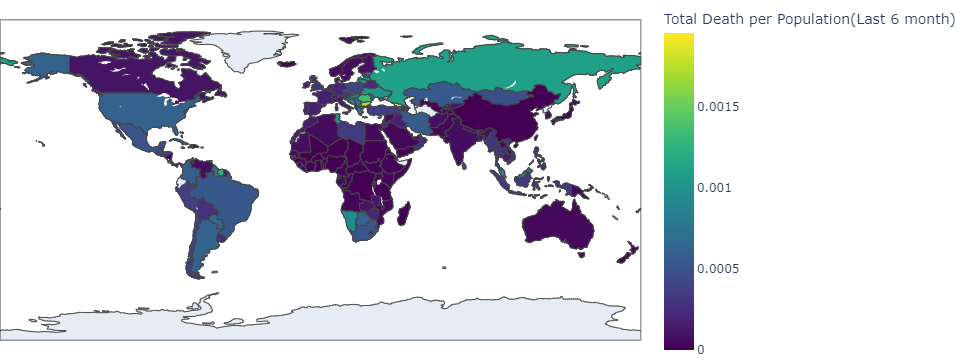

In [86]:
def q5():
    with connect() as connection:
        with connection.cursor() as cursor:
            cursor.execute(Q_five)
            return cursor.fetchall()
q5_data = q5()


q5_dataframe = pd.DataFrame(data=np.vstack(q5_data),columns=['location','iso_code','continent','total_death_per_population'])
q5_dataframe = q5_dataframe[q5_dataframe.total_death_per_population != 'nan']
q5_dataframe = q5_dataframe[['location','iso_code','total_death_per_population']]
q5_dataframe['total_death_per_population'] = q5_dataframe['total_death_per_population'].astype(np.float64) 



fig = px.choropleth(q5_dataframe ,
                    locations = 'iso_code',
                    color='total_death_per_population', 
                    color_continuous_scale='Viridis',
                    range_color=(0, 0.00196),
                    labels = {'total_death_per_population': 'Total Death per Population(Last 6 month)'},
                    hover_data=['location'],
                    )
fig.update_layout(margin={'r':0 , 'b':0 , 't':0 , 'l':0})
fig.show()

#####  :به ازای برخی کشورها مثل گرین لند و ... به ازای 180 روز اخیر آنها نال داریم و به نظر من در اینجا بهترین کار حذف نال است. چون تعبیر آن با صفر غلط بوده. همچنین روش هایی مثل میانگین روزهای قبل شش ماه و... نیز به نظرم جوابگو نیست . زیرا 
* اولا طبق نمودار سوال قبلی روند کرونا تغییر کرده و مشابه قبل نیست
* ... ثانیا این کشور ها معمولا ستون فوتی شان کلا نال است. در واقع از همان ابتدا. کشورهایی مثل گرین لند، ترکمنستان، آنگولا ، واتیکان و 
<br/><br/><br/>
 <hr/> 
<br/><br/><br/>